<a href="https://colab.research.google.com/github/turnontheAC/SQC/blob/sqc/car_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math
import random
import scipy
import statistics
import numpy as np
import scipy.stats
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import plotly.graph_objects as go
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp as mc
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [2]:
df = pd.read_csv('/content/pleasework - Sheet1 (1).csv') 
df

,Unnamed: 0,X1,X2,X3,X4,X5,1,2,3,4.00,STDDEV
0,NaN,1,1,1,-1,1,38.50,40.00,40.25,51.75,6.132224
1,NaN,1,1,1,1,1,44.00,43.00,41.75,36.00,3.578728
2,NaN,1,1,-1,-1,1,79.75,72.00,76.50,82.25,4.427659
3,NaN,1,1,-1,1,1,46.50,50.50,51.00,56.00,3.894440
4,NaN,1,-1,1,-1,1,96.00,82.00,93.00,78.50,8.439737
5,NaN,1,-1,-1,-1,1,62.50,64.50,63.25,69.50,3.151554
6,NaN,1,-1,-1,1,1,58.00,56.25,58.00,62.25,2.553592
7,NaN,1,-1,1,1,1,67.00,78.00,70.00,79.25,5.994355
8,NaN,-1,1,1,-1,1,45.25,48.00,44.50,41.25,2.776389
9,NaN,-1,1,1,1,1,43.50,43.00,42.00,45.75,1.586072


In [3]:
df = df.astype(float)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  0 non-null      float64
 1   X1          32 non-null     float64
 2   X2          32 non-null     float64
 3   X3          32 non-null     float64
 4   X4          32 non-null     float64
 5   X5          32 non-null     float64
 6   1           32 non-null     float64
 7   2           32 non-null     float64
 8   3           32 non-null     float64
 9   4.00        32 non-null     float64
 10  STDDEV      32 non-null     float64
dtypes: float64(11)
memory usage: 2.9 KB


In [5]:
X=df[['X1',	'X2',	'X3',	'X4',	'X5']]
X

,X1,X2,X3,X4,X5
0,1.0,1.0,1.0,-1.0,1.0
1,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,-1.0,-1.0,1.0
3,1.0,1.0,-1.0,1.0,1.0
4,1.0,-1.0,1.0,-1.0,1.0
5,1.0,-1.0,-1.0,-1.0,1.0
6,1.0,-1.0,-1.0,1.0,1.0
7,1.0,-1.0,1.0,1.0,1.0
8,-1.0,1.0,1.0,-1.0,1.0
9,-1.0,1.0,1.0,1.0,1.0


In [6]:
model = ols('STDDEV ~ (X1) + (X2) + (X1):(X2) + (X3) + (X1): (X3) + (X2):(X3) + (X4) + (X1):(X4) + (X2):(X4) + (X3):(X4) + (X5) + (X1): (X5) +(X2): (X5) + (X3):(X5) + (X4):(X5)', data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
X1,53.558220,1.0,66.923807,4.145395e-07
X2,5.629119,1.0,7.033880,1.739287e-02
X1:X2,3.830680,1.0,4.786636,4.386802e-02
X3,7.203145,1.0,9.000708,8.477412e-03
X1:X3,6.642948,1.0,8.300713,1.085857e-02
X2:X3,9.687004,1.0,12.104420,3.097021e-03
X4,8.519720,1.0,10.645837,4.887600e-03
X1:X4,0.060483,1.0,0.075577,7.869019e-01
X2:X4,0.305602,1.0,0.381865,5.453030e-01
X3:X4,0.039563,1.0,0.049436,8.268617e-01


In [7]:
xx=X.to_numpy()
poly= PolynomialFeatures(degree=4, interaction_only=True)
xxpd=pd.DataFrame(poly.fit_transform(xx), columns=['I','X1', 'X2', 'X3','X4', 'X5', 'X1X2', 'X1X3', 'X2X3', 'X1X2X3','X1X4', 'X2X4', 'X3X4', 'X1X2X4', 'X1X3X4', 'X2X3X4', 'X1X2X3X4', 'X1X5', 'X2X5', 'X3X5', 'X4X5','X1X2X5', 'X1X3X5', 'X1X4X5', 'X2X3X5', 'X2X4X5', 'X3X4X5', 'X1X2X3X5', 'X1X2X4', 'X1X2X4X5', 'X2X3X4X5'])
xxpd


,I,X1,X2,X3,X4,X5,X1X2,X1X3,X2X3,X1X2X3,...,X1X2X5,X1X3X5,X1X4X5,X2X3X5,X2X4X5,X3X4X5,X1X2X3X5,X1X2X4,X1X2X4X5,X2X3X4X5
0,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,1.0,-1.0,1.0,...,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0,...,-1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0,1.0
3,1.0,1.0,1.0,-1.0,1.0,1.0,1.0,-1.0,1.0,1.0,...,1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0
4,1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,...,-1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0
5,1.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,...,-1.0,-1.0,1.0,1.0,1.0,-1.0,1.0,1.0,1.0,-1.0
6,1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0,1.0,...,1.0,1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0
7,1.0,1.0,-1.0,1.0,1.0,1.0,-1.0,1.0,1.0,1.0,...,1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0
8,1.0,-1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,...,1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0,1.0,-1.0
9,1.0,-1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0


In [8]:
X=xxpd[['X1', 'X2', 'X3','X4', 'X5', 'X1X2', 'X1X3', 'X2X3', 'X1X2X3','X1X4', 'X2X4', 'X3X4', 'X1X2X4', 'X1X3X4', 'X2X3X4', 'X1X2X3X4', 'X1X5', 'X2X5', 'X3X5', 'X4X5','X1X2X5', 'X1X3X5', 'X1X4X5', 'X2X3X5', 'X2X4X5', 'X3X4X5', 'X1X2X3X5', 'X1X2X4', 'X1X2X4X5', 'X2X3X4X5']]
X

,X1,X2,X3,X4,X5,X1X2,X1X3,X2X3,X1X2X3,X1X4,...,X1X3X5,X1X4X5,X2X3X5,X2X4X5,X3X4X5,X1X2X3X5,X1X2X4,X1X2X4,X1X2X4X5,X2X3X4X5
0,1.0,1.0,1.0,-1.0,1.0,1.0,1.0,-1.0,1.0,1.0,...,-1.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0,-1.0,...,1.0,-1.0,-1.0,1.0,1.0,-1.0,1.0,-1.0,1.0,1.0
3,1.0,1.0,-1.0,1.0,1.0,1.0,-1.0,1.0,1.0,-1.0,...,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0
4,1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,...,1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0
5,1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,...,-1.0,1.0,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,-1.0
6,1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0,1.0,1.0,...,1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0
7,1.0,-1.0,1.0,1.0,1.0,-1.0,1.0,1.0,1.0,-1.0,...,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0
8,-1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0,...,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0
9,-1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,...,1.0,1.0,1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0


In [9]:
Y=df[['STDDEV']]
regr=LinearRegression()
regr.fit(X,Y)
Yhat=regr.predict(X)
Yhat

array([[6.14194221],
       [3.56900908],
       [4.4179407 ],
       [3.90415906],
       [8.43001878],
       [3.16127243],
       [2.54387366],
       [6.00407356],
       [2.76666996],
       [1.59579077],
       [3.19415338],
       [1.5229126 ],
       [1.71754371],
       [3.23386483],
       [0.95344788],
       [2.94479774],
       [4.33002028],
       [3.61815776],
       [3.93347104],
       [3.36528142],
       [7.41889082],
       [5.34975512],
       [5.28692981],
       [7.33165958],
       [2.40328635],
       [0.66728462],
       [3.4203871 ],
       [2.54591488],
       [3.48730396],
       [2.95629145],
       [0.72626149],
       [3.27171567]])

In [10]:
Yobs=Y.to_numpy()
eij= Yobs - regr.predict(X)
eij

array([[-0.00971858],
       [ 0.00971858],
       [ 0.00971858],
       [-0.00971858],
       [ 0.00971858],
       [-0.00971858],
       [ 0.00971858],
       [-0.00971858],
       [ 0.00971858],
       [-0.00971858],
       [-0.00971858],
       [ 0.00971858],
       [-0.00971858],
       [ 0.00971858],
       [-0.00971858],
       [ 0.00971858],
       [ 0.00971858],
       [-0.00971858],
       [-0.00971858],
       [ 0.00971858],
       [-0.00971858],
       [ 0.00971858],
       [-0.00971858],
       [ 0.00971858],
       [-0.00971858],
       [ 0.00971858],
       [ 0.00971858],
       [-0.00971858],
       [ 0.00971858],
       [-0.00971858],
       [ 0.00971858],
       [-0.00971858]])

In [11]:
regr.coef_

array([[ 1.2937134 , -0.41941623,  0.47444525, -0.5159857 , -0.12534816,
        -0.34598954,  0.4556228 ,  0.04347524, -0.02851912, -0.55019895,
        -0.09772435,  0.30214655,  0.01758075,  0.0423551 ,  0.16544358,
        -0.11059815, -0.12508447,  0.02438895,  0.19998579, -0.28739755,
         0.16921309, -0.18314873, -0.19541102,  0.0395909 , -0.01679614,
        -0.02639058,  0.17229402, -0.28181933,  0.01758075,  0.0423551 ,
        -0.20483561, -0.00820863]])

In [12]:
regr.intercept_

array([3.63169005])

In [13]:
X = sm.add_constant(X)
X

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,X1,X2,X3,X4,X5,X1X2,X1X3,X2X3,X1X2X3,...,X1X3X5,X1X4X5,X2X3X5,X2X4X5,X3X4X5,X1X2X3X5,X1X2X4,X1X2X4,X1X2X4X5,X2X3X4X5
0,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,1.0,-1.0,1.0,...,-1.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0,...,1.0,-1.0,-1.0,1.0,1.0,-1.0,1.0,-1.0,1.0,1.0
3,1.0,1.0,1.0,-1.0,1.0,1.0,1.0,-1.0,1.0,1.0,...,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0
4,1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,...,1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0
5,1.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,...,-1.0,1.0,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,-1.0
6,1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0,1.0,...,1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0
7,1.0,1.0,-1.0,1.0,1.0,1.0,-1.0,1.0,1.0,1.0,...,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0
8,1.0,-1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,...,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0
9,1.0,-1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,...,1.0,1.0,1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0


In [14]:
model = sm.OLS(Y, X)
res=model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 STDDEV   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     1246.
Date:                Thu, 27 Oct 2022   Prob (F-statistic):             0.0224
Time:                        00:51:25   Log-Likelihood:                 102.87
No. Observations:                  32   AIC:                            -143.7
Df Residuals:                       1   BIC:                            -98.31
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.6317      0.010    373.685      0.0

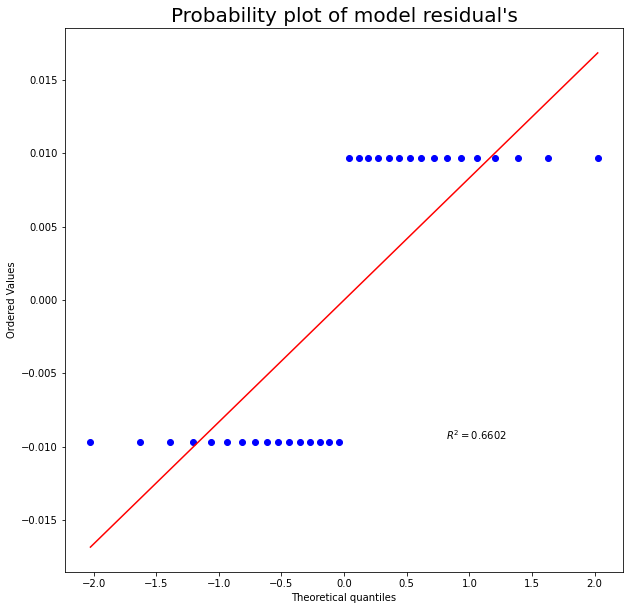

In [40]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(res.resid, plot= plt, rvalue= True)
ax.set_title("Probability plot of model residual's", fontsize= 20)
ax.set

plt.show()

In [16]:
stats.levene(df['STDDEV'][df['X1'] == -1],
             df['STDDEV'][df['X1'] == 1])

LeveneResult(statistic=2.9141479936439474, pvalue=0.0981374513844288)

In [17]:
stats.levene(df['STDDEV'][df['X2'] == -1],
             df['STDDEV'][df['X2'] == 1])

LeveneResult(statistic=3.0010660269129557, pvalue=0.09348090995892878)

In [18]:
stats.levene(df['STDDEV'][df['X3'] == -1],
             df['STDDEV'][df['X3'] == 1])

LeveneResult(statistic=3.166024846998871, pvalue=0.0853195325924703)

In [19]:
stats.levene(df['STDDEV'][df['X4'] == -1],
             df['STDDEV'][df['X4'] == 1])

LeveneResult(statistic=0.07976710926614249, pvalue=0.7795527322115097)

In [20]:
stats.levene(df['STDDEV'][df['X5'] == -1],
             df['STDDEV'][df['X5'] == 1])

LeveneResult(statistic=0.001358252285762349, pvalue=0.970845187509955)

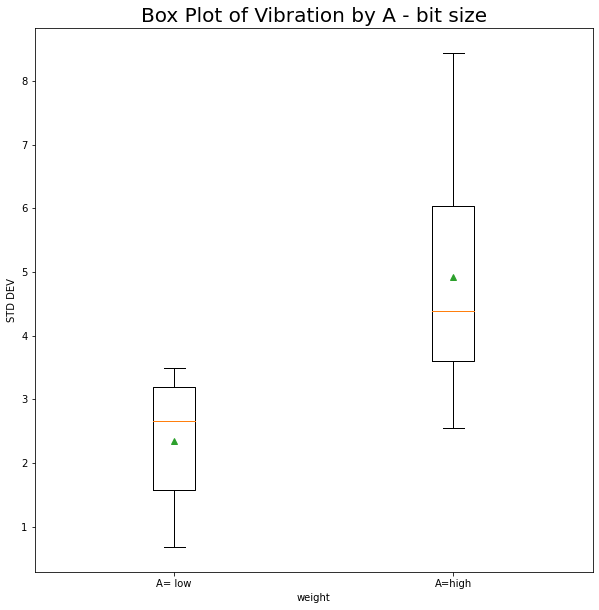

In [21]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

ax.set_title("Box Plot of Vibration by A - bit size", fontsize= 20)
ax.set

data2 = [df['STDDEV'][df['X1'] == -1],
             df['STDDEV'][df['X1'] == 1]]


ax.boxplot(data2,
           labels= ['A= low', 'A=high'],
           showmeans= True)

plt.xlabel("weight")
plt.ylabel("STD DEV")

plt.show()

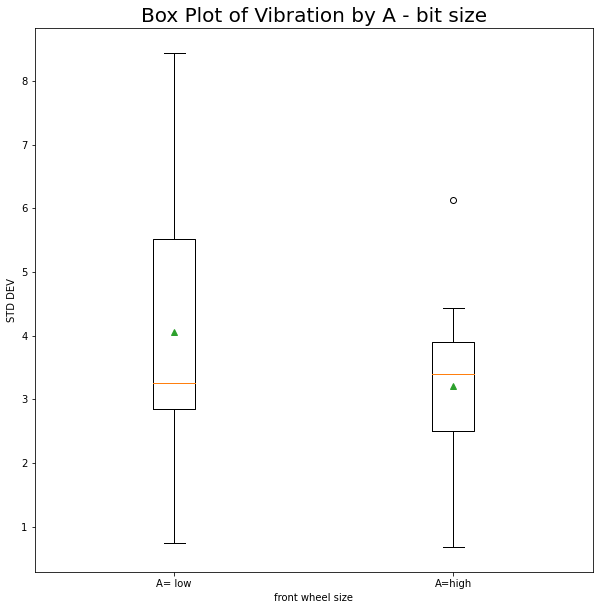

In [22]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

ax.set_title("Box Plot of Vibration by A - bit size", fontsize= 20)
ax.set

data2 = [df['STDDEV'][df['X2'] == -1],
             df['STDDEV'][df['X2'] == 1]]


ax.boxplot(data2,
           labels= ['A= low', 'A=high'],
           showmeans= True)

plt.xlabel("front wheel size")
plt.ylabel("STD DEV")

plt.show()

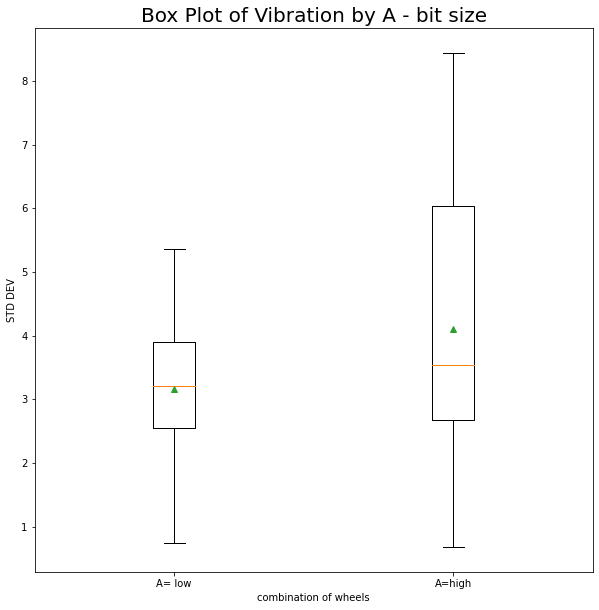

In [23]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

ax.set_title("Box Plot of Vibration by A - bit size", fontsize= 20)
ax.set

data2 = [df['STDDEV'][df['X3'] == -1],
             df['STDDEV'][df['X3'] == 1]]


ax.boxplot(data2,
           labels= ['A= low', 'A=high'],
           showmeans= True)

plt.xlabel("combination of wheels")
plt.ylabel("STD DEV")

plt.show()

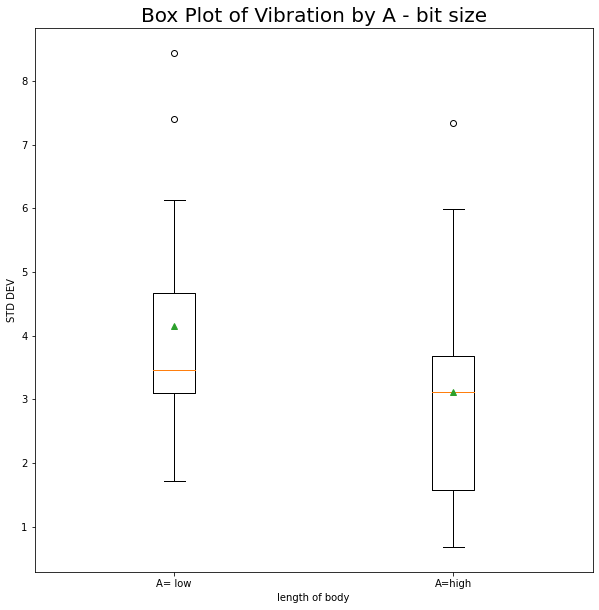

In [24]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

ax.set_title("Box Plot of Vibration by A - bit size", fontsize= 20)
ax.set

data2 = [df['STDDEV'][df['X4'] == -1],
             df['STDDEV'][df['X4'] == 1]]


ax.boxplot(data2,
           labels= ['A= low', 'A=high'],
           showmeans= True)

plt.xlabel("length of body")
plt.ylabel("STD DEV")

plt.show()

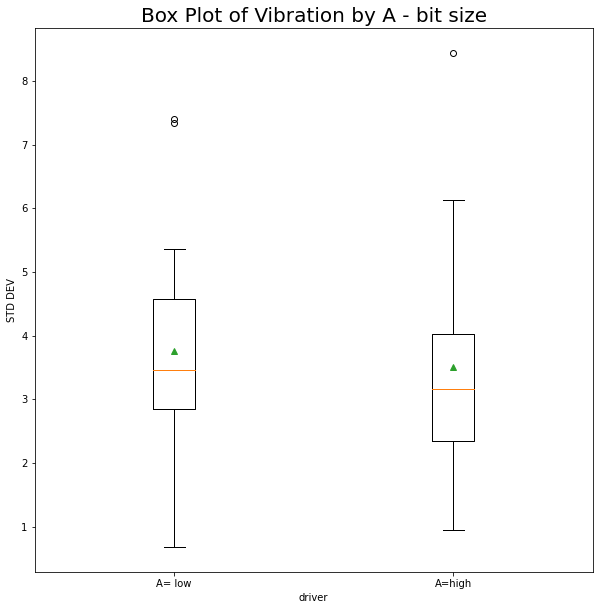

In [25]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

ax.set_title("Box Plot of Vibration by A - bit size", fontsize= 20)
ax.set

data2 = [df['STDDEV'][df['X5'] == -1],
             df['STDDEV'][df['X5'] == 1]]


ax.boxplot(data2,
           labels= ['A= low', 'A=high'],
           showmeans= True)

plt.xlabel("driver")
plt.ylabel("STD DEV")

plt.show()

In [26]:
N = len(eij)
c = list(range(0, N))
order = random.sample(c, N) # this should be replaced by the exact run order if the random order is not used
print('order of observations/residuals is')
print(order)

order of observations/residuals is
[28, 14, 27, 21, 31, 10, 15, 2, 11, 17, 18, 24, 6, 12, 29, 13, 25, 8, 22, 19, 3, 4, 5, 7, 30, 26, 16, 23, 20, 1, 9, 0]


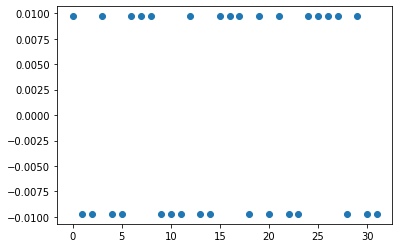

In [27]:
eij=res.resid
x = range(0,N) 
y = eij[order] 
plt.scatter(x, y)

In [35]:
Z=X[['const','X1', 'X2', 'X3','X4', 'X5']]
Z.head()

,const,X1,X2,X3,X4,X5
0,1.0,1.0,1.0,1.0,-1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,-1.0,-1.0,1.0
3,1.0,1.0,1.0,-1.0,1.0,1.0
4,1.0,1.0,-1.0,1.0,-1.0,1.0


In [34]:
model2 = sm.OLS(Y, Z)
res2=model2.fit()
print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:                 STDDEV   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     10.43
Date:                Thu, 27 Oct 2022   Prob (F-statistic):           1.42e-05
Time:                        01:08:36   Log-Likelihood:                -47.980
No. Observations:                  32   AIC:                             108.0
Df Residuals:                      26   BIC:                             116.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.6317      0.213     17.087      0.0

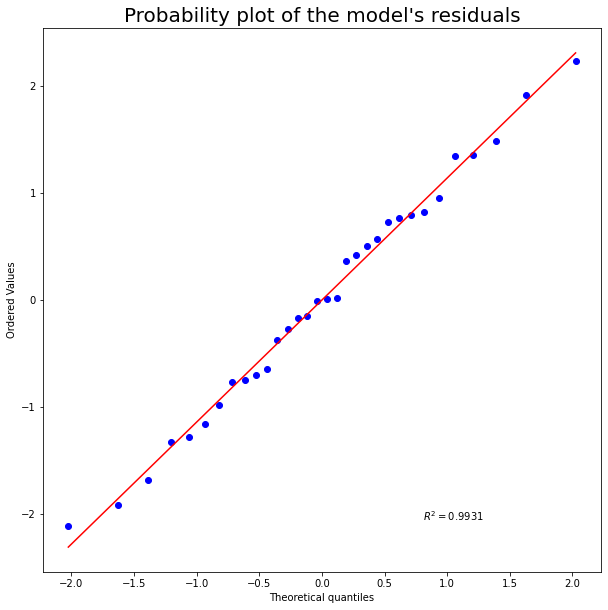

In [42]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(res2.resid, plot= plt, rvalue= True)
ax.set_title("Probability plot of the model's residuals", fontsize= 20)
ax.set

plt.show()

In [36]:
ZZ=X[['const','X1', 'X2', 'X3','X4']]
ZZ.head()

,const,X1,X2,X3,X4
0,1.0,1.0,1.0,1.0,-1.0
1,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,-1.0,-1.0
3,1.0,1.0,1.0,-1.0,1.0
4,1.0,1.0,-1.0,1.0,-1.0


In [37]:
model3 = sm.OLS(Y, ZZ)
res3=model3.fit()
print(res3.summary())

                            OLS Regression Results                            
Dep. Variable:                 STDDEV   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     13.28
Date:                Thu, 27 Oct 2022   Prob (F-statistic):           4.19e-06
Time:                        01:10:00   Log-Likelihood:                -48.193
No. Observations:                  32   AIC:                             106.4
Df Residuals:                      27   BIC:                             113.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.6317      0.210     17.297      0.0

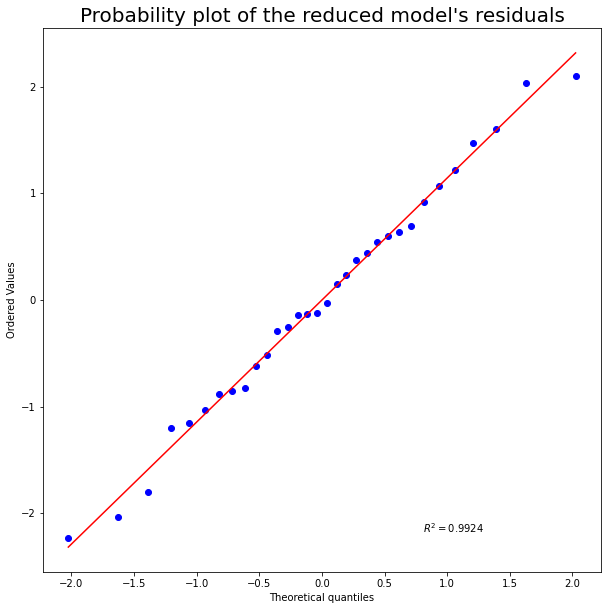

In [41]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(res3.resid, plot= plt, rvalue= True)
ax.set_title("Probability plot of the reduced model's residuals", fontsize= 20)
ax.set

plt.show()